## PAUTA Control 2 INFO273. Redes de Colas
Utilice papel y lápiz para los desarrollos teóricos, les toma una foto y los incorpora como imagen en este notebook.
Para las partes que requieren cálculos matemáticos utilice código incrustado (en R o Python según sea su conveniencia).
Suba la carpeta comprimida con sus respuestas al espacio definido en siveducMD.

**1.** Considere una red de colas abierta con 3 nodos cuyos servidores poseen tiempos de servicio exponencialmente distribuidos con valores medios de $E(s_1) = 0.09$, $E(s_2) = 0.06$ y $E(s_3) = 0.04[seg]$ respectivamente. Sólo al primer nodo llegan trabajos con una tasa de $4[trab/seg]$. El primer nodo es multiservidor con $m=2$, los otros nodos poseen un único servidor. La probabilidades de ruteo son:

$$q_{11} = 0.2\qquad q_{21} = 1\qquad q_{31} = 0.5$$

$$q_{12} = 0.4\qquad q_{30} = 0.5\qquad q_{13} = 0.4$$

**(a)** Dibuje la red de colas y el grafo asociado.

**(b)** Determine la probabilidad en el equilibrio para el estado $n=(4,3,2)$

**(c)** Determine todas las medidas de desempeño de la red. Comente sus resultados.

**Respuesta (a)**

La red colas queda:

<img src="modelo14.png" width="400">


y el grafo:
<img src="modelo14b.png" width="300">

**Respuesta (b)**

Para calcular la probabilidad solicitada, primero es necesario resolver las ecuaciones de balance de flujo:
$$\lambda_1 = \gamma + 0.2 \lambda_1 + \lambda_2 + 0.5 \lambda_3$$
$$\lambda_2 = 0.4 \lambda_1$$
$$\lambda_3 = 0.4 \lambda_1$$
reemplazando las dos últimas ecuaciones en la primera se tiene:
$$\lambda_1(1-0.2-0.4-0.5*0.4) = \gamma \implies \lambda_1 = \frac{\gamma}{0.2}= \frac{4}{0.2}= 20$$
$$\implies \lambda_2 = \lambda_3= 0.4*20 = 8$$

ya vimos en ejercicio en clases, que para el nodo 1 que tiene 2 servidores se cumple:

$$\pi_1(j) = 2 \frac{1- \rho_1}{1 +\rho_1} \rho_1^j \qquad 
\text{con}
\qquad \rho_1 = \frac{\lambda_1}{2\mu_1} \qquad j\geq 1$$

$$\pi_1(0) = \frac{1- \rho_1}{1 +\rho_1}$$

Y para los otros dos nodos (SSFR) se tiene:
$$\pi_i(j) = \frac{1- \rho_i}{1 +\rho_i} \rho_i^j \qquad 
\text{con}
\qquad \rho_i = \frac{\lambda_i}{\mu_i} \qquad j\geq 0,\, i=2,3 $$

De esta manera:
$$\mu_1 = \frac{1}{0.09} = \frac{100}{9} \implies \rho_1 = \frac{\lambda_1}{2*\mu_1} = \frac{20*9}{2*100}= \frac{9}{10}$$

$$\mu_2 = \frac{1}{0.06} = \frac{100}{6} \implies \rho_2 = \frac{\lambda_2}{\mu_2}= \frac{8*6}{*100}= \frac{48}{100}= \frac{12}{25}$$

$$\mu_3 = \frac{1}{0.04} = \frac{100}{4} \implies \rho_3 = \frac{\lambda_3}{\mu_3}= \frac{8*4}{*100}= \frac{32}{100}= \frac{8}{25}$$

Y podemos proceder con los cálculos de (b) y (c)

In [23]:
#**Resolución:
# (b)
ro <- c(9/10,12/25,8/25)
pi432<-2*(ro[1])^4 *(1-ro[1])/(1+ro[1])*(ro[2]^3)*(1-ro[2])*(ro[3]^2)*(1-ro[3])
print(pi432)
#(c) Número promedio de trabajos en cada nodo: L1 = 2ro_1/(1+ro_1), L2 = ro_2/(1-ro_2) id L3
L1 = 2*ro[1]/(1-ro[1]^2)
L2 = ro[2]/(1-ro[2])
L3 = ro[3]/(1-ro[3])
L = c(L1,L2,L3)
print(L)
#Utilizaciones: U_i = 1-ro_i,i=2,3 , U_1 = 1- (1-ro_1)/(1+ro_1)
U1 = 1-(1-ro[1])/(1+ro[1])
U = c(U1,1-ro[2],1-ro[3])
print(U)
#Tiempos de Respuesta R_i = L_i/tasa_i
tasa = c(20,8,8)
R = L/tasa
print(R)
# Medidas globales R = (L1+L2+L3)/gamma
Ltot = L1+L2+L3
Rtot = Ltot/4
print(c(Ltot,Rtot))

[1] 0.0002765555
[1] 9.4736842 0.9230769 0.4705882
[1] 0.9473684 0.5200000 0.6800000
[1] 0.47368421 0.11538462 0.05882353
[1] 10.867349  2.716837


Se aprecia que el dispositivo de mayor utilización es el nodo 1 con una probabilidad de estar ocupado del 94,7%

**2.** Considere una base de datos distribuida compuesta por dos servidores (nodos 2 y 3) los cuales prestan servicio a K=10 clientes cuyo tiempo de reflexión se distribuye exponencial con media de $20[s]$ (nodo 1) . Suponga que cada consulta que realiza un cliente se procesa inicialmente en el servidor 2. Una vez completado el servicio en  un servidor, cada consulta  tiene igual probabilidad de requerir el servicio del otro servidor o completar el requerimiento y devolver la respuesta al cliente  ($q_{21} = q_{23} = q_{31} = q_{32}=0.5$). Los servidores poseen tasa de servicio exponencial $\mu_1=1[c/s]$ y $\mu_2= 0.2[c/s]$ respectivamente.
 
**(a)** Modele este problema como una red de colas cerrada. Dibuje el grafo asociado.
**(b)** Utilice cualquiera de los algoritmos que conoce para determinar número promedio de consultas en cada servidor (y su cola) y el tiempo medio de respuesta de cada uno y la tasa de proceso de la base de datos distribuida.  Comente sus resultados. 
**(c)** Suponga que el número de estaciones de trabajo (clientes) en el sistema es variable, con $k=2,11, ...30$.  Grafique el comportamiento de la tasa de proceso del sistema en función de $k$. Interprete sus resultados.


**Respuesta (a)**

La red colas queda:
<img src="modelo10.png" width="400">


y el grafo:
<img src="modelo10b.png" width="400">


**Respuesta (b)**

Utilizaremos el algoritmo iterativo del valor medio para calcular las medidas de desempeño en cada nodo. Para ello se requiere calcular previamente las tasas de visita en cada nodo.

A partir de la red abierta equivalente, las tasas de visitas se calculan como:
$$v_0=1 v_1 \implies v_1 = 1$$
$$v_2 = v_1+0.5v_3$$
$$v_3 = 0.5v_2$$
Reemplazando la tercera ecuación en la primera, queda:
$$v_2(1-0.5*0.5) = v_1 = 1 \implies v_2 = \frac{1}{0.75} = \frac{4}{3}$$
$$\implies v_3 = \frac{4}{3*2} = \frac{4}{6}$$



In [19]:
K=10
M=3
L <- rep(0,M)
R <- rep(0,M)
U <- rep(0,M)
u <- c(0.05,1,0.2)
v <- c(1,4/3,4/6)
prob <- matrix(1,nrow=K+1,ncol=M)
nprob <- matrix(1,nrow=K+1,ncol=M)
# Cálculo de mu_i(j), i=1,2,3,4 y j=1,...K
mu <- matrix(0,nrow=K,ncol=M)
mu[1,] <- u
for (k in 2:K){
    mu[k,]<- c(u[1]*k,u[2],u[3])
}

#algoritmo iterativo para calcular R, T, L y U
for (k in 1:K){   
    R <- rep(0,M)  
    for (j in 1:k){
        R <- R + (prob[j,]*rep(j,M)/mu[j,])
    }
    T <- k/(t(v)%*%R)
    L <- rep(0,M)
    sum <- rep(0,M)
    for (j in 1:k){
        nprob[j+1,] <- rep(T,M)*(v/mu[j,])*prob[j,]
        sum <- sum + nprob[j+1,]
        L <- L + rep(j,M)*nprob[j+1,]
    }
    U <- sum
    nprob[1,] <- rep(1,M) - U
    prob <- nprob  
}
print(prob)
tasa = rep(T,M)*v
print(rbind(L,U,tasa,R))

             [,1]         [,2]       [,3]
 [1,] 0.002702653 6.263405e-01 0.06585136
 [2,] 0.016214896 2.397276e-01 0.09707469
 [3,] 0.048637035 8.868532e-02 0.13009722
 [4,] 0.097235811 3.115069e-02 0.15635878
 [5,] 0.145710242 1.015444e-02 0.16571794
 [6,] 0.174421868 2.985722e-03 0.15158599
 [7,] 0.173345813 7.638665e-04 0.11625613
 [8,] 0.146276292 1.620726e-04 0.07171627
 [9,] 0.105383782 2.656927e-05 0.03334132
[10,] 0.063050126 2.975758e-06 0.01037862
[11,] 0.027021483 1.700433e-07 0.00162166
           [,1]      [,2]       [,3]
L     5.6048918 0.5720555  3.8230527
U     0.9972973 0.3736595  0.9341486
tasa  0.2802446 0.3736595  0.1868297
R    20.0000000 1.5309541 20.4627643


Como se puede ver con 10 clientes en el sistema, los servidores no alcanzan saturación, aunque el nodo 3, se encuentra mas estresado que el nodo 2, debido a que su tasa de servicio es bastante menor (1/5) que la del nodo 2.


**Respuesta (c)**

Se considera iterar en el número de clientes para observar con cuantos clientes se alcanza la saturación del nodo 2 y a que tasa de proceso corresponde esto.

[1] 2.00000000 0.07939914 0.94420601 0.10586552 0.26466381
[1] 3.0000000 0.1162030 0.9775019 0.1549374 0.3873435
[1] 4.0000000 0.1505155 0.9885344 0.2006873 0.5017182
[1] 5.0000000 0.1818504 0.9930068 0.2424671 0.6061679
[1] 6.0000000 0.2097098 0.9950994 0.2796131 0.6990328
[1] 7.0000000 0.2336504 0.9961795 0.3115338 0.7788346
[1] 8.0000000 0.2533743 0.9967720 0.3378324 0.8445810
[1] 9.0000000 0.2688247 0.9971070 0.3584329 0.8960822
[1] 10.0000000  0.2802446  0.9972973  0.3736595  0.9341486
[1] 11.0000000  0.2881624  0.9974039  0.3842166  0.9605414
[1] 12.0000000  0.2932947  0.9974619  0.3910595  0.9776489
[1] 13.0000000  0.2964033  0.9974923  0.3952044  0.9880110
[1] 14.0000000  0.2981668  0.9975077  0.3975558  0.9938895
[1] 15.0000000  0.2991081  0.9975151  0.3988108  0.9970270
[1] 16.0000000  0.2995835  0.9975185  0.3994447  0.9986117
[1] 17.0000000  0.2998123  0.9975201  0.3997497  0.9993742
[1] 18.0000000  0.2999178  0.9975208  0.3998905  0.9997262
[1] 19.0000000  0.2999649  0.997

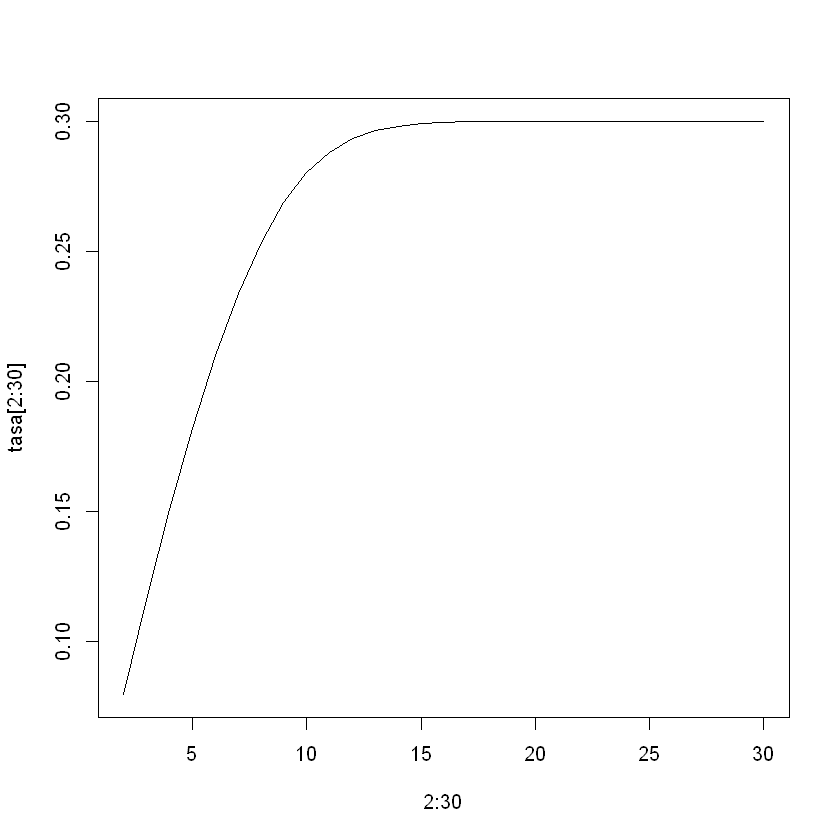

In [18]:
tasa <- rep(0,30)
for (K in 2:30){
M=3
L <- rep(0,M)
R <- rep(0,M)
U <- rep(0,M)
u <- c(0.05,1,0.2)
v <- c(1,4/3,4/6)
prob <- matrix(1,nrow=K+1,ncol=M)
nprob <- matrix(1,nrow=K+1,ncol=M)
# Cálculo de mu_i(j), i=1,2,3,4 y j=1,...K
mu <- matrix(0,nrow=K,ncol=M)
mu[1,] <- u
for (k in 2:K){
    mu[k,]<- c(u[1]*k,u[2],u[3])
}

#algoritmo iterativo para calcular R, T, L y U
for (k in 1:K){   
    R <- rep(0,M)  
    for (j in 1:k){
        R <- R + (prob[j,]*rep(j,M)/mu[j,])
    }
    T <- k/(t(v)%*%R)
    L <- rep(0,M)
    sum <- rep(0,M)
    for (j in 1:k){
        nprob[j+1,] <- rep(T,M)*(v/mu[j,])*prob[j,]
        sum <- sum + nprob[j+1,]
        L <- L + rep(j,M)*nprob[j+1,]
    }
    U <- sum
    nprob[1,] <- rep(1,M) - U
    prob <- nprob  
}
tasa[K] = T
    print (c(K,T,U))
}
plot(2:30,tasa[2:30],type="l")

La saturación del nodo 3 se alcanza con 27 clientes y la tasa máxima de proceso es de 0.3 consultas por segundo.